# Exemplo de regressão linear com Statsmodels

In [1]:
import pandas as pd
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("heavymachine_data.csv", sep=";")
output_colum = "Hours"
input_colums = ["Model","Aplication","Age"]
#retira coluna inutil
df.drop("Chassi", axis="columns", inplace=True)
#retira dados ruidosos
hours = df["Hours"]
std = hours.std()
mean = hours.mean()
df.drop(hours[hours > mean+std].index, inplace=True)
df_dummys = pd.get_dummies(df, columns=["Aplication", "Model"])
train_dataset = df.sample(frac=0.7,random_state=0)
test_dataset = df.drop(train_dataset.index)
train_ds_dummys = df_dummys.sample(frac=0.7,random_state=0)
test_ds_dummys = df_dummys.drop(train_dataset.index)
df.head()

,Hours,Model,Aplication,Age
0,461,111,71,11
1,277,90,39,10
2,905,87,35,10
3,437,87,72,10
4,311,90,35,10


# Relações entre as entradas e a saida

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

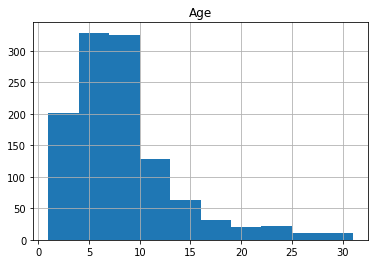

In [4]:
# df.plot.scatter("Age", "Hours")
df.hist("Age")

array([[<AxesSubplot:title={'center':'Model'}>]], dtype=object)

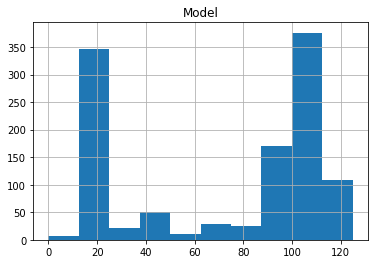

In [6]:
# df.plot.scatter("Model", "Hours")
df.hist("Model")

array([[<AxesSubplot:title={'center':'Aplication'}>]], dtype=object)

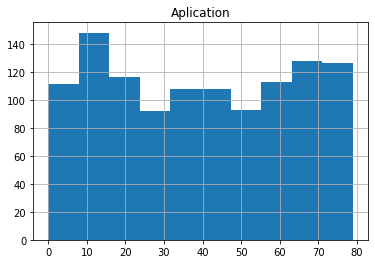

In [7]:
# df.plot.scatter("Aplication", "Hours")
df.hist("Aplication")

<AxesSubplot:>

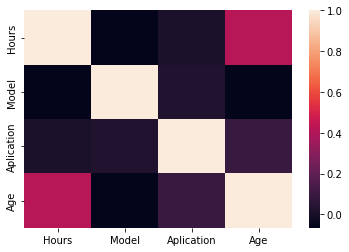

In [5]:
sns.heatmap(df.corr())

# O modelo

## Não categórico

In [5]:
# model = ols("Hours ~ Age + C(Aplication) + C(Model)", data=train_dataset)
model = ols("Hours ~ Age + Aplication + Model", data=train_dataset)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Hours   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     58.94
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           2.06e-34
Time:                        09:42:27   Log-Likelihood:                -7428.8
No. Observations:                 800   AIC:                         1.487e+04
Df Residuals:                     796   BIC:                         1.488e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1152.7725    283.809      4.062      0.000     595.669    1709.876
Age          243.2449     18.379     13.235      0.000     207.169     279.321
Aplication    -3.9010      3.945     -0.989      0.323     -11.645       3.843
Model         -0.0415      2.258     -0.018      0.985      -4.473       4.390
==============================================================================
Omnibus:                      690.031   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20587.445
Skew:                           3.807   Prob(JB):                         0.00
Kurtosis:                      26.657   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Categórico (um pouco ruim de ler devido as muitas colunas categóricas)

In [6]:
columns_names = train_ds_dummys.columns.to_list()[1:]
s = "Hours~"
for i in columns_names:
    s += i+"+"
s = s[:len(s)-1]
# print(s)
model_categorical = ols(s, data=train_ds_dummys)
response_categorical = model_categorical.fit()
response_categorical.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Hours   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     8.997
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.75e-82
Time:                        09:42:52   Log-Likelihood:                -7126.0
No. Observations:                 800   AIC:                         1.450e+04
Df Residuals:                     678   BIC:                         1.507e+04
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       899.7047    250.161      3.597      0.000     408.521    1390.888
Age             277.3685     15.925     17.417      0.000     246.101     308.636
Aplication_0   -121.5478    621.221     -0.196      0.845   -1341.297    1098.201
Aplication_1   -134.0460    701.368     -0.191      0.848   -1511.160    1243.067
Aplication_2    255.1754    734.772      0.347      0.728   -1187.528    1697.878
Aplication_3    704.1974    800.366      0.880      0.379    -867.297    2275.692
Aplication_4  -1137.8076    528.475     -2.153      0.032   -2175.451    -100.164
Aplication_5   2317.4083    805.455      2.877      0.004     735.922    3898.894
Aplication_6   1889.6664    645.632      2.927      0.004     621.989    3157.344
Aplication_7   -259.6862    570.690     -0.455      0.649   -1380.219     860.847
Aplication_8   1046.8082    705.994      1.483      0.139    -339.390    2433.006
Aplication_9    785.5104    480.979      1.633      0.103    -158.876    1729.897
Aplication_11   172.2081   1119.649      0.154      0.878   -2026.187    2370.604
Aplication_12  2069.2744    619.285      3.341      0.001     853.327    3285.222
Aplication_13   224.4657   1369.163      0.164      0.870   -2463.844    2912.775
Aplication_14   747.0941    539.073      1.386      0.166    -311.360    1805.548
Aplication_15   878.7249    444.868      1.975      0.049       5.240    1752.210
Aplication_16  -738.8871    608.210     -1.215      0.225   -1933.089     455.314
Aplication_17   163.3508    975.197      0.168      0.867   -1751.419    2078.120
Aplication_18  -718.4647    442.730     -1.623      0.105   -1587.751     150.821
Aplication_19  -986.7832    470.980     -2.095      0.037   -1911.538     -62.028
Aplication_20  -858.6833    953.138     -0.901      0.368   -2730.141    1012.774
Aplication_21 -1263.4087    975.006     -1.296      0.195   -3177.803     650.986
Aplication_22   110.1566    800.139      0.138      0.891   -1460.892    1681.205
Aplication_23  -852.4125   1929.324     -0.442      0.659   -4640.580    2935.755
Aplication_24   579.0573   1377.461      0.420      0.674   -2125.544    3283.658
Aplication_25   113.5076    657.090      0.173      0.863   -1176.668    1403.683
Aplication_26   777.7397    795.721      0.977      0.329    -784.634    2340.113
Aplication_27  -2.01e-12   1.77e-12     -1.138      0.256   -5.48e-12    1.46e-12
Aplication_28  -169.9258    796.602     -0.213      0.831   -1734.030    1394.178
Aplication_29  -471.8640    511.418     -0.923      0.357   -1476.018     532.290
Aplication_30  -489.1563    796.610     -0.614      0.539   -2053.276    1074.964
Aplication_31   -74.5321    519.723     -0.143      0.886   -1094.993     945.929
Aplication_32   814.3774    560.597      1.453      0.147    -286.338    1915.093
Aplication_33  1007.6505    661.004      1.524   

# Validando valores

## Mae para não categórico

In [81]:
errors = []
for i,r in test_dataset.iterrows():    
    y_true = pd.to_numeric(r["Hours"])
    in_data = pd.DataFrame([{"Model": r["Model"], "Aplication": r["Aplication"], "Age":r["Age"]}])
    y_pred = response.predict(in_data)[0]
    errors.append(abs(y_pred - y_true))
mae = np.mean(errors)
print(mae)

1750.3630236649171


## Mae para categórico

In [85]:
errors = []
for i,r in test_ds_dummys.iterrows(): 
    y_true = pd.to_numeric(r["Hours"])
    r.drop("Hours", inplace=True)
    in_data = r
    y_pred = response_categorical.predict(in_data).values[0]
    errors.append(abs(y_pred - y_true))
mae = np.mean(errors)
print(mae)

1510.2331646296955


# Prevendo valores

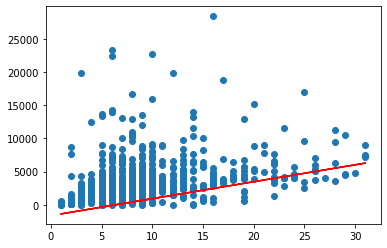

In [7]:
MODEL = 90
APLICATION = 39

model = []
age = []
Aplication = []
y = []
x = []
for i,r in df.iterrows():    
    model.append(r["Model"])
    age.append(r["Age"])
    Aplication.append(r["Aplication"])
    x.append([r["Model"], r["Age"], r["Aplication"]])
    y.append(r["Hours"])

y_pred = []
t = []
samples = len(y)
for i in range(samples):
    entrada = pd.DataFrame([{"Model": MODEL, "Aplication": APLICATION, "Age":age[i]}])
    t.append(age[i])
    y_pred.append(response.predict(entrada)[0])

plt.figure()
plt.plot(t, y_pred, "r")
plt.scatter(t, y[:samples])
plt.show()


# Comparando com os valores que tinha antes

    Hours  Model  Aplication  Age
1     277     90          39   10
97   3909     90          39    9


C:\Users\Pichau\AppData\Local\Temp/ipykernel_15148/2882375223.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = a[df["Aplication"] == APLICATION]


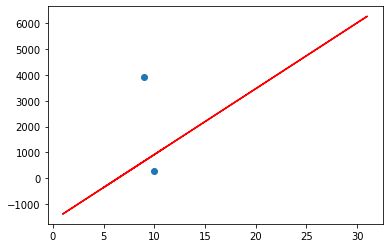

In [8]:
a = df[df["Model"] == MODEL]
a = a[df["Aplication"] == APLICATION]
print(a)
plt.figure()
plt.plot(t, y_pred, "r")
plt.scatter(a["Age"], a["Hours"])
plt.show()


Select some aplications

In [11]:
aplications = []
counter = 0
limit = 5
for i,r in df.iterrows():
    if(counter >= limit):
        break
    if r["Aplication"] in aplications:
        pass
    else:
        counter += 1
        # limit = counter+1
        aplications.append(r["Aplication"])
print(aplications)


[71, 39, 35, 72, 60]


Aplication:  71
Aplication:  39
Aplication:  35
Aplication:  72
Aplication:  60


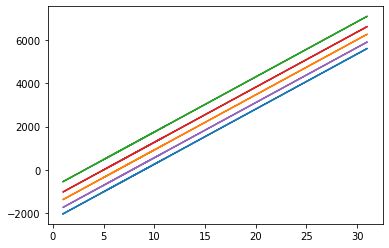

In [12]:
plt.figure()
for j in range(limit):
    MODEL = 90
    APLICATION = aplications[j]
    y_pred = []
    t = []
    samples = len(y)
    for i in range(samples):
        entrada = pd.DataFrame([{"Model": MODEL, "Aplication": APLICATION, "Age":age[i]}])
        t.append(age[i])
        y_pred.append(response.predict(entrada)[0])
    print("Aplication: ", aplications[j])    
    plt.plot(t, y_pred)
plt.show()